In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_underway = pd.read_csv('/Users/simon/Work/ECOSAT3/DAP/in2019_v04.uwy.csv')

df_underway.rename(columns={'datetime':'time'},inplace=True)
df_underway['time'] = pd.to_datetime(df_underway['time'])
df_underway.set_index('time',inplace=True)

df_underway = df_underway.resample('s').asfreq()

df_underway.interpolate(inplace=True)

#df_underway

df_underway.columns


Index(['latitude', 'longitude', 'alt', 'speedOG', 'courseOG', 'shipHeading',
       'depth', 'longitudinalWaterSpeed', 'transverseWaterSpeed',
       'longitudinalGroundSpeed', 'transverseGroundSpeed', 'lockOnWater',
       'lockonGround', 'portAirTemp', 'portHumidity', 'stbdAirTemp',
       'stbdHumidity', 'maxWindGust', 'portRelWindDir', 'portRelWindSpeed',
       'portTrueWindDir', 'portTrueWindSpeed', 'stbdRelWindDir',
       'stbdRelWindSpeed', 'stbdTrueWindDir', 'stbdTrueWindSpeed',
       'stbdDewPoint', 'portDewPoint', 'atmPressure', 'ultrasonicRelWindSpeed',
       'ultrasonicRelWindDir', 'ultrasonicTrueWindSpeed',
       'ultrasonicTrueWindDir', 'portRain', 'stbdRain', 'portRadiometer',
       'stbdRadiometer', 'portPyranometer', 'stbdPyranometer', 'portPAR',
       'stbdPAR', 'gyroHeading', 'equTemp', 'XCO2', 'waterVapour',
       'licorPressure', 'equPressure', 'waterFlow', 'licorFlow', 'ventFlow',
       'condTemp', 'pumpSpeed', 'isarWaterTemp', 'portKeelExtension',
      

/Users/simon/anaconda2/envs/stagpy/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


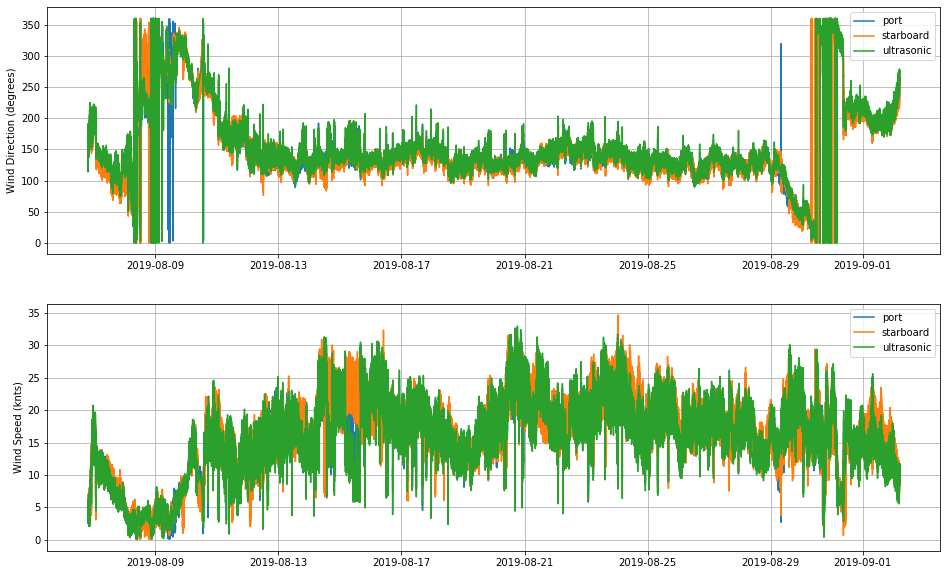

In [17]:
plt.figure(figsize=(16,10))

plt.subplot(211)
plt.plot(df_underway.portTrueWindDir,label='port')
plt.plot(df_underway.stbdTrueWindDir,label='starboard')
plt.plot(df_underway.ultrasonicTrueWindDir,label='ultrasonic')
plt.legend()
plt.ylabel('Wind Direction (degrees)')
plt.grid()

plt.subplot(212)
plt.plot(df_underway.portTrueWindSpeed,label='port')
plt.plot(df_underway.stbdTrueWindSpeed,label='starboard')
plt.plot(df_underway.ultrasonicTrueWindSpeed,label='ultrasonic')
plt.legend()
plt.ylabel('Wind Speed (knts)')
plt.grid()
plt.savefig('IN2019_V04_WindDirectionSpeed.png')
plt.show()


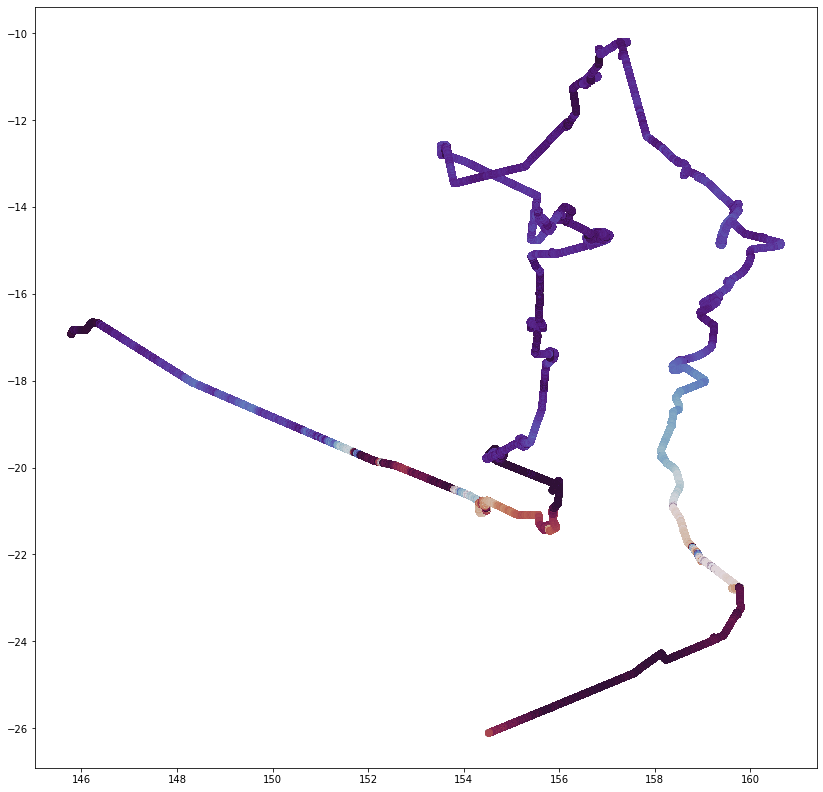

In [11]:

plt.figure(figsize=(14,14))
plt.scatter(df_underway.longitude,df_underway.latitude,c=df_underway.portTrueWindDir,cmap=plt.cm.twilight)
